In [1]:
!pip install catboost
!pip install imbalanced-learn
!pip install lightgbm

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# Feature Transformation Related Methods

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from imblearn.combine import SMOTEENN, SMOTETomek


# MachineLearning Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/ANANDHU/OneDrive/Desktop/Documents/capstone_project_BIA/heart_attack_youngsters_india.csv')
data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),HeartAttack_Chance
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


## Splitting Blood Pressure (systolic/diastolic mmHg) Into Systolic_BP, Diastolic_BP And Drop Blood Pressure (systolic/diastolic mmHg) Column

In [4]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True)
data['Systolic_BP'] = pd.to_numeric(data['Systolic_BP'], errors='coerce').astype(float)
data['Diastolic_BP'] = pd.to_numeric(data['Diastolic_BP'], errors='coerce').astype(float)
data = data.drop('Blood Pressure (systolic/diastolic mmHg)', axis=1)
data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),HeartAttack_Chance,Systolic_BP,Diastolic_BP
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,82,Normal,Non-anginal,183,No,94.1,58,No,177.0,63.1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,76,Normal,Non-anginal,118,No,97.1,341,No,137.5,110.7
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,86,Normal,Typical,164,No,92.7,373,Yes,138.3,76.6
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,106,Normal,Non-anginal,188,No,98.4,102,Yes,177.1,90.0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,73,Normal,Atypical,216,No,94.9,235,No,130.7,108.8


In [5]:
data.duplicated().sum()

0

## Feature Importance

### LabelEncoder is used to convert the categorical features into numerical representations

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'data' is your DataFrame and 'HeartAttack_Chance' is the target column
X = data.drop('HeartAttack_Chance', axis=1)  # Features
y = data['HeartAttack_Chance']  # Target variable

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create an OrdinalEncoder for categorical features
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to categorical features
X[categorical_features] = ordinal_encoder.fit_transform(X[categorical_features])

# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)  # Adjust hyperparameters as needed
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_feature = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_feature = importance_feature.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_feature)


                            Feature  Importance
24                      Systolic_BP    0.082146
23      Triglyceride Levels (mg/dL)    0.080363
25                     Diastolic_BP    0.079918
15                      BMI (kg/m²)    0.078587
14       Cholesterol Levels (mg/dL)    0.075492
22      Blood Oxygen Levels (SpO2%)    0.073488
20      Maximum Heart Rate Achieved    0.073113
17         Resting Heart Rate (bpm)    0.068967
0                               Age    0.054368
9             Screen Time (hrs/day)    0.051619
10         Sleep Duration (hrs/day)    0.039842
2                            Region    0.033591
19                  Chest Pain Type    0.026216
4                               SES    0.020050
5                    Smoking Status    0.019072
6               Alcohol Consumption    0.018122
8           Physical Activity Level    0.017127
16                     Stress Level    0.017015
7                         Diet Type    0.016566
1                            Gender    0

## Plotting Feature Importances

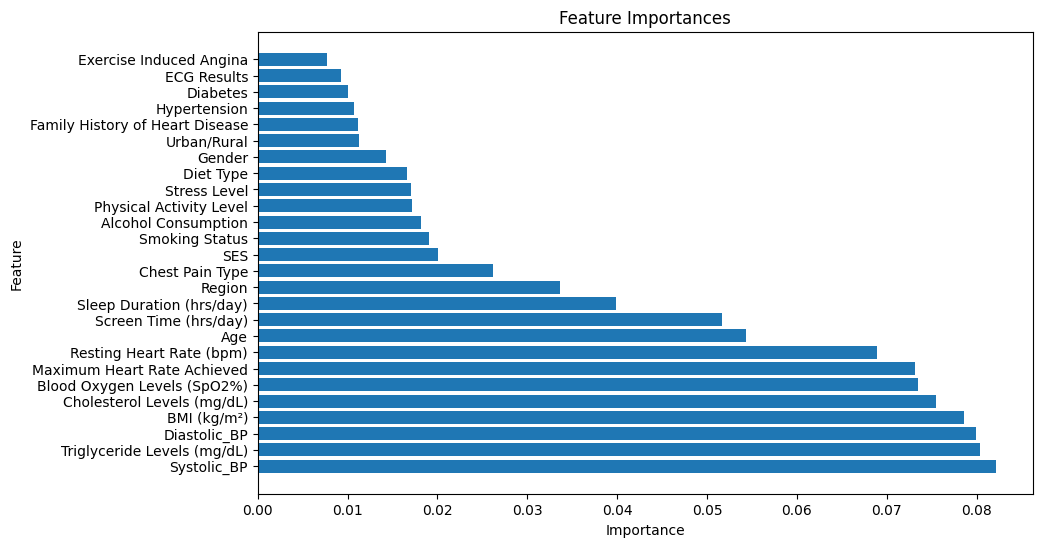

In [7]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(importance_feature['Feature'], importance_feature['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [8]:
selected_features = ['Systolic_BP', 'Triglyceride Levels (mg/dL)', 'Diastolic_BP', 'BMI (kg/m²)',
                    'Cholesterol Levels (mg/dL)', 'Blood Oxygen Levels (SpO2%)',
                    'Maximum Heart Rate Achieved', 'Resting Heart Rate (bpm)', 'Age',
                    'Screen Time (hrs/day)']

X_selected = data[selected_features]  # Create your new feature set

In [9]:
X = data[selected_features]
y = data['HeartAttack_Chance']

In [10]:
X.shape, y.shape      # Checking X,y shape

((10000, 10), (10000,))

## Building a Preprocessing Pipeline for Numerical and Categorical Features

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define selected features and target variable
selected_features = ['Systolic_BP', 'Triglyceride Levels (mg/dL)', 'Diastolic_BP', 'BMI (kg/m²)',
                     'Cholesterol Levels (mg/dL)', 'Blood Oxygen Levels (SpO2%)',
                     'Maximum Heart Rate Achieved', 'Resting Heart Rate (bpm)', 'Age',
                     'Screen Time (hrs/day)']
X = data[selected_features]
y = data['HeartAttack_Chance']

# Separate numeric and categorical columns from selected features
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Numeric pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Handles unknown categories
])

# Combine pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', cat_pipeline, categorical_features)],

)

# Fit and transform the data
X_pre_transformed = preprocessor.fit_transform(X)

# Check transformed shape
print(f"Transformed data shape: {X_pre_transformed.shape}")



Transformed data shape: (10000, 10)


In [12]:
import pickle

with open("preproccesor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

In [13]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Systolic_BP', 'Triglyceride Levels (mg/dL)',
                                  'Diastolic_BP', 'BMI (kg/m²)',
                                  'Cholesterol Levels (mg/dL)',
                                  'Blood Oxygen Levels (SpO2%)',
                                  'Maximum Heart Rate Achieved',
                                  'Resting Heart Rate (bpm)', 'Age',
                                  'Screen Time (hrs/day)']),
                                ('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 [])])

In [14]:
print(X_pre_transformed)

[[ 1.61058016 -1.6846053  -1.54697129 ... -0.43271001  0.65811631
  -0.97500255]
 [-0.09285307  0.51226618  1.21791705 ... -0.77918291 -0.50377802
   1.61883667]
 [-0.05835315  0.76067568 -0.76281178 ... -0.20172807 -0.50377802
   1.61883667]
 ...
 [-0.81303876  0.34148465 -0.4898081  ... -1.58761969  1.04541442
  -1.40730908]
 [-1.2787876   0.32595906  0.6138238  ... -0.31721904 -1.08472518
   0.32191706]
 [ 1.13620635 -1.51382377 -0.36201914 ... -0.72143743  0.2708182
  -0.54269601]]


In [15]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Reshape y to 2D array as OrdinalEncoder expects 2D input
y_reshaped = np.array(y).reshape(-1, 1)

# Create OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Fit and transform the target variable
y_encoded = ordinal_encoder.fit_transform(y_reshaped).flatten()

# Check the encoded values and shape
print(y_encoded)
print(y_encoded.shape)


[0. 0. 1. ... 0. 0. 0.]
(10000,)


In [16]:
smt = SMOTEENN()  #SMOTEENN is a technique that combines SMOTE and Edited Nearest Neighbors
X_resampled, y_resampled = smt.fit_resample(X_pre_transformed, y_encoded)
X_resampled.shape, y_resampled.shape

((10104, 10), (10104,))

In [17]:
def evaluate_clf(true, predicted):                                    # Evaluation Metrics
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)                                 #This function calculates and returns accuracy, precision, recall,score for a classifier's performance
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1 , precision, recall, roc_auc

## Model Evaluation Framework using GridSearchCV and Performance Metrics

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tqdm.notebook import tqdm
import pandas as pd
import pickle

def evaluate_models(X, y, models, params, save_best_model_path="best_model.pkl"):
    """
    Evaluates multiple models using GridSearchCV and saves the best model to a pickle file.

    Parameters:
    - X: Features (DataFrame or ndarray).
    - y: Target labels (Series or ndarray).
    - models: Dictionary of model names and their corresponding instances.
    - params: Dictionary of hyperparameter grids for each model.
    - save_best_model_path: Path to save the best model as a pickle file.

    Returns:
    - A DataFrame summarizing the train and test accuracy of each model.
    """

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize lists to store results
    report_of_models = {}
    model_names = []
    accuracy_scores = []
    auc_scores = []

    best_overall_model = None
    best_overall_accuracy = 0
    best_model_name = None

    # Iterate through models and their parameters
    for model_name, model_instance in tqdm(models.items(), desc="Evaluating models"):
        print(f"Evaluating {model_name}...")
        param_grid = params.get(model_name, {})

        # Perform Grid Search
        gs = GridSearchCV(model_instance, param_grid, cv=3, scoring='accuracy', verbose=1)
        gs.fit(X_train, y_train)

        # Update the model with the best parameters
        best_model = gs.best_estimator_

        # Refit the model on the training set
        best_model.fit(X_train, y_train)

        # Predictions for train and test sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluate performance on training and test sets
        train_metrics = evaluate_clf(y_train, y_train_pred)
        test_metrics = evaluate_clf(y_test, y_test_pred)

        # Display model performance
        print(f"Best Parameters for {model_name}: {gs.best_params_}")
        print("\nModel performance on Training Set:")
        print(f"- Accuracy: {train_metrics[0]:.4f}")
        print(f"- F1 Score: {train_metrics[1]:.4f}")
        print(f"- Precision: {train_metrics[2]:.4f}")
        print(f"- Recall: {train_metrics[3]:.4f}")
        print(f"- ROC AUC Score: {train_metrics[4]:.4f}")

        print("\nModel performance on Test Set:")
        print(f"- Accuracy: {test_metrics[0]:.4f}")
        print(f"- F1 Score: {test_metrics[1]:.4f}")
        print(f"- Precision: {test_metrics[2]:.4f}")
        print(f"- Recall: {test_metrics[3]:.4f}")
        print(f"- ROC AUC Score: {test_metrics[4]:.4f}")
        print("=" * 40)

        # Append results for report
        model_names.append(model_name)
        accuracy_scores.append(test_metrics[0])
        auc_scores.append(test_metrics[4])

        # Update the best model if it outperforms others
        if test_metrics[0] > best_overall_accuracy:
            best_overall_accuracy = test_metrics[0]
            best_overall_model = best_model
            best_model_name = model_name

    # Save the best model to a pickle file
    if best_overall_model is not None:
        with open(save_best_model_path, "wb") as file:
            pickle.dump(best_overall_model, file)
        print(f"The best model '{best_model_name}' has been saved to '{save_best_model_path}'.")

    # Create a performance report DataFrame
    report = pd.DataFrame({
        "Model Name": model_names,
        "Accuracy": accuracy_scores,
        "ROC AUC Score": auc_scores
    }).sort_values(by="Accuracy", ascending=False)

    return report



## Define models with parameters

In [19]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    'BaggingClassifier': BaggingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'BalancedBaggingClassifier': BalancedBaggingClassifier()
}

param_grids = {
    'BaggingClassifier': {
        'n_estimators': [50, 100],  # Reduced maximum
        'max_samples': [0.8, 1.0],  # Focus on higher values
        'max_features': [0.8, 1.0],
        'bootstrap_features': [False]  # Simplified to reduce variability
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],  # Reduced maximum
        'learning_rate': [0.05, 0.1],  # Focus on mid-range
        'max_depth': [3, 5],  # Shallower trees
        'min_samples_split': [5, 10],
        'subsample': [0.8, 1.0],
        'min_samples_leaf': [2, 4]

    },
    'LGBMClassifier': {
        'n_estimators': [100, 200],  # Reduced maximum
        'learning_rate': [0.05, 0.1],  # Focused range
        'num_leaves': [31, 63],  # Balanced range
        'max_depth': [3, 5],
        'min_child_samples': [50, 100]  # Focus on higher values
    },
    'BalancedBaggingClassifier': {
        'n_estimators': [50, 100],  # Reduced maximum
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0],
        'bootstrap_features': [False]  # Simplified
    }
}



In [20]:
report = evaluate_models(X_resampled, y_resampled, models, param_grids)

Evaluating models:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluating BaggingClassifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for BaggingClassifier: {'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}

Model performance on Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

Model performance on Test Set:
- Accuracy: 0.8629
- F1 Score: 0.9024
- Precision: 0.9130
- Recall: 0.8920
- ROC AUC Score: 0.8419
Evaluating KNeighborsClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Model performance on Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

Model performance on Test Set:
- Accuracy: 0.9238
- F1 Score: 0.9489
- Precision: 0.9051
- Recall: 0.9972
- ROC AUC Score: 0.8706
Evaluating GradientBoostingClassifier...
F

In [21]:
print(report)

                   Model Name  Accuracy  ROC AUC Score
1        KNeighborsClassifier  0.923800       0.870620
0           BaggingClassifier  0.862939       0.841897
4   BalancedBaggingClassifier  0.844631       0.877972
2  GradientBoostingClassifier  0.833251       0.791208
3              LGBMClassifier  0.831766       0.801773


In [22]:
selected_features_values = data[selected_features]
print(selected_features_values)

      Systolic_BP  Triglyceride Levels (mg/dL)  Diastolic_BP  BMI (kg/m²)  \
0           177.0                           58          63.1         34.4   
1           137.5                          341         110.7         25.0   
2           138.3                          373          76.6         33.9   
3           177.1                          102          90.0         19.0   
4           130.7                          235         108.8         28.0   
...           ...                          ...           ...          ...   
9995        127.6                          296          64.8         20.1   
9996        162.5                          254          77.4         27.4   
9997        120.8                          319          81.3         22.9   
9998        110.0                          317         100.3         35.1   
9999        166.0                           80          83.5         33.1   

      Cholesterol Levels (mg/dL)  Blood Oxygen Levels (SpO2%)  \
0         

In [23]:
print(selected_features_values.head())  # Shows the first 5 rows


   Systolic_BP  Triglyceride Levels (mg/dL)  Diastolic_BP  BMI (kg/m²)  \
0        177.0                           58          63.1         34.4   
1        137.5                          341         110.7         25.0   
2        138.3                          373          76.6         33.9   
3        177.1                          102          90.0         19.0   
4        130.7                          235         108.8         28.0   

   Cholesterol Levels (mg/dL)  Blood Oxygen Levels (SpO2%)  \
0                         148                         94.1   
1                         124                         97.1   
2                         256                         92.7   
3                         137                         98.4   
4                         262                         94.9   

   Maximum Heart Rate Achieved  Resting Heart Rate (bpm)  Age  \
0                          183                        82   30   
1                          118                      

In [36]:

import pickle

# 2. Function to predict based on user input:
def predict_heart_attack_risk():  # Renamed the function
    # Load the saved best model
    with open("best_model.pkl", "rb") as f:
        best_model = pickle.load(f)
    # Get user input for features
    input_data = {}
    for feature in selected_features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_data[feature] = [value]  # Store as a list for DataFrame
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    # Create DataFrame from input data
    input_df = pd.DataFrame(input_data)

    # Preprocess the input data
    preprocessed_input = preprocessor.transform(input_df)

    # Make prediction
    prediction = best_model.predict(preprocessed_input)[0]  # Get the first element

    # Interpret prediction
    if prediction == 1:
        print("The model predicts a HIGH risk of heart attack.")
    else:
        print("The model predicts a LOW risk of heart attack.")

# 3. Call the function to start prediction:
predict_heart_attack_risk()  # Call the renamed function

The model predicts a HIGH risk of heart attack.


In [38]:
import pandas as pd

# Assuming 'data' is your DataFrame 
selected_features = ['Systolic_BP', 'Triglyceride Levels (mg/dL)', 'Diastolic_BP', 'BMI (kg/m²)',
                     'Cholesterol Levels (mg/dL)', 'Blood Oxygen Levels (SpO2%)',
                     'Maximum Heart Rate Achieved', 'Resting Heart Rate (bpm)', 'Age',
                     'Screen Time (hrs/day)']

# Select the desired columns and target variable
selected_data = data[selected_features + ['HeartAttack_Chance']] 

# Save to a new CSV file
selected_data.to_csv('latest_data.csv', index=False)

In [45]:
# Split the resampled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) 

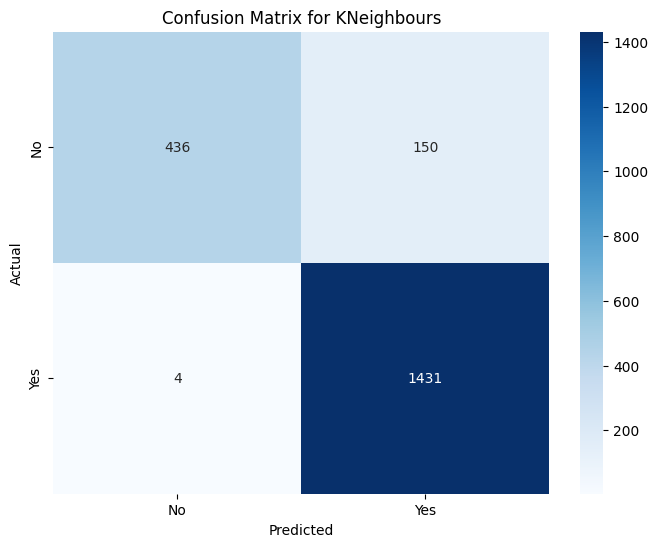

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle  # Import pickle for loading the model


# Load the best model
with open("best_model.pkl", "rb") as f:  # Assuming "best_model.pkl" is the saved file
    best_model = pickle.load(f)

# Assuming you have X_test, y_test loaded (from your previous cells)

# 1. Get predictions for the test set:
y_pred = best_model.predict(X_test)

# 2. Create the confusion matrix:
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the confusion matrix using seaborn:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNeighbours')
plt.show()